In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [2]:
os.chdir('C:\\Users\\Maniteja\\Downloads\\dataset')
train=pd.read_csv('train.csv')
train

customer_id              Name  age gender  \
0          fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1      fffe43004900440032003100300035003700       Traci Peery   32      F   
2          fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3      fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4      fffe43004900440031003900350030003600      Meghan Kosak   31      F   
...                                     ...               ...  ...    ...   
36987  fffe43004900440035003500390036003100          Cuc Tarr   46      F   
36988  fffe43004900440033003500380036003600    Jenni Stronach   29      F   
36989      fffe4300490044003500330034003100     Luciana Kinch   23      F   
36990  fffe43004900440031003200390039003000     Tawana Ardoin   53      M   
36991  fffe43004900440033003600340034003200  Verlene Beaulieu   35      M   

      security_no region_category  membership_category joining_date  \
0         XW0DQ7H         Village  Platinum Membership   2017-08-17   
1         5K0N3X1            City   Premium Membership   2017-08-28   
2         1F2TCL3            Town        No Membership   2016-11-11   
3         VJGJ33N            City        No Membership   2016-10-29   
4         SVZXCWB            City        No Membership   2017-09-12   
...           ...             ...                  ...          ...   
36987     6F51HFO             NaN     Basic Membership   2017-09-21   
36988     21KSM8Y            Town     Basic Membership   2016-06-27   
36989     XK1IM9H             NaN     Basic Membership   2016-09-11   
36990     K6VTP1Z         Village  Platinum Membership   2017-06-15   
36991     LBX0GLR            Town    Silver Membership   2015-10-23   

      joined_through_referral referral_id  ... avg_time_spent  \
0                          No    xxxxxxxx  ...     300.630000   
1                           ?    CID21329  ...     306.340000   
2                         Yes    CID12313  ...     516.160000   
3                         Yes     CID3793  ...      53.270000   
4                          No    xxxxxxxx  ...     113.130000   
...                       ...         ...  ...            ...   
36987                      No    xxxxxxxx  ...    -650.682759   
36988                      No    xxxxxxxx  ...    -638.123421   
36989                     Yes     CID3838  ...     154.940000   
36990                      No    xxxxxxxx  ...     482.610000   
36991                      No    xxxxxxxx  ...      79.180000   

      avg_transaction_value avg_frequency_login_days points_in_wallet  \
0                  53005.25                     17.0       781.750000   
1                  12838.38                     10.0              NaN   
2                  21027.00                     22.0       500.690000   
3                  25239.56                      6.0       567.660000   
4                  24483.66                     16.0       663.060000   
...                     ...                      ...              ...   
36987              27277.68                      6.0       639.510000   
36988              11069.71                     28.0       527.990000   
36989              38127.56                    Error       680.470000   
36990               2378.86                     20.0       197.264414   
36991               2189.68                    Error       719.970000   

       used_special_discount  offer_application_preference  past_complaint  \
0                        Yes                           Yes              No   
1                        Yes                            No             Yes   
2                         No                           Yes             Yes   
3                         No                           Yes             Yes   
4                         No                           Yes             Yes   
...                      ...                           ...             ...   
36987                     No                      

In [3]:
# Test data
test=pd.read_csv('test.csv')
test

customer_id              Name  age gender  \
0      fffe43004900440031003700300030003400    Alethia Meints   50      F   
1      fffe43004900440031003900370037003300        Ming Lopez   41      M   
2      fffe43004900440034003800360037003000  Carina Flannigan   31      F   
3      fffe43004900440036003200370033003400      Kyung Wanner   64      M   
4      fffe43004900440035003000370031003900       Enola Gatto   16      F   
...                                     ...               ...  ...    ...   
19914  fffe43004900440035003600330037003800       Kraig Peele   12      M   
19915  fffe43004900440032003900370037003100     Damaris Sabol   40      F   
19916  fffe43004900440036003100310036003700    Loura Huckstep   55      M   
19917  fffe43004900440034003200330033003600     Sharita Clubb   17      F   
19918  fffe43004900440036003200340030003100       Ying Branum   20      M   

      security_no region_category membership_category joining_date  \
0         OQJ1XAY         Village  Premium Membership   2015-11-02   
1         OUQRPKO         Village     Gold Membership   2016-03-01   
2         02J2RE7            Town   Silver Membership   2017-03-03   
3         5YEQIF1            Town   Silver Membership   2017-08-18   
4         100RYB5            Town       No Membership   2015-05-05   
...           ...             ...                 ...          ...   
19914     2V0HA0O             NaN     Gold Membership   2015-01-25   
19915     VJGQD6Q         Village       No Membership   2017-12-31   
19916     ADE7LWA            Town       No Membership   2015-09-09   
19917     A35KUBS            City   Silver Membership   2016-04-17   
19918     IPJKJJV            Town  Premium Membership   2017-10-30   

      joined_through_referral referral_id  ... days_since_last_login  \
0                          No    xxxxxxxx  ...                    12   
1                          No    xxxxxxxx  ...                    11   
2                          No    xxxxxxxx  ...                    18   
3                         Yes     CID8941  ...                  -999   
4                         Yes     CID5690  ...                     6   
...                       ...         ...  ...                   ...   
19914                      No    xxxxxxxx  ...                    16   
19915                     Yes    CID45490  ...                    21   
19916                      No    xxxxxxxx  ...                    18   
19917                     Yes    CID37167  ...                     3   
19918                     Yes    CID56352  ...                     8   

      avg_time_spent avg_transaction_value avg_frequency_login_days  \
0             386.26              40721.44                      7.0   
1              37.80               9644.40                      9.0   
2             215.36               3693.25                     21.0   
3              44.57              36809.56                     11.0   
4             349.88              40675.86                      8.0   
...              ...                   ...                      ...   
19914         103.57              46279.35                     18.0   
19915          63.19              23466.26                    Error   
19916          68.72              17903.75                     24.0   
19917         119.54              14057.09                     22.0   
19918         505.26              36786.44                    Error   

       points_in_wallet  used_special_discount  offer_application_preference  \
0            733.830000                    Yes                            No   
1            726.000000                    Yes                            No   
2            713.780000                    Yes                            No   
3            744.970000                    Yes                            No   
4            299.048351                     No                           Yes   
...                 ...                    ...                      

In [4]:
train.shape

(36992, 25)

In [5]:
ProfileReport(train)

In [6]:
test.shape

(19919, 24)

In [7]:
ProfileReport(test)

In [8]:
l=[]
for i in range(train.shape[0]):
    if(train['churn_risk_score'][i]==-1):
        l.append(i)
        
train = train.drop(l,axis=0)

In [9]:
ab = train[train['avg_frequency_login_days']!='Error']
ab['avg_frequency_login_days'] = ab['avg_frequency_login_days'].astype('float64')
posmean = ab[ab['avg_frequency_login_days']>0]['avg_frequency_login_days'].mean()

<ipython-input-9-580e13dbe2a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab['avg_frequency_login_days'] = ab['avg_frequency_login_days'].astype('float64')


In [10]:
## Handling avg_frequency_login_days error value and negative values

l = []
for i in train['avg_frequency_login_days']:
    if i =='Error' or '-' in str(i):
        l.append(posmean)
    else:
        l.append(i)
        
train['avg_frequency_login_days'] = l
train['avg_frequency_login_days'] = train['avg_frequency_login_days'].astype('float64')


l = []
for i in test['avg_frequency_login_days']:
    if i =='Error' or '-' in str(i):
        l.append(posmean)
    else:
        l.append(i)
        
test['avg_frequency_login_days'] = l
test['avg_frequency_login_days'] = test['avg_frequency_login_days'].astype('float64')

In [11]:
#Without Garbage Value
dsllp = train[train['days_since_last_login']>0]
mu = np.mean(dsllp['days_since_last_login'])
sigma = np.std(dsllp['days_since_last_login'])
np.random.seed(13)
s = np.random.normal(mu, sigma, 100000).astype('int64')

In [12]:
## Handling days_since_last_login -999
import random
np.random.seed(13)
l = []
for i in train['days_since_last_login']:
    if i == -999:
        num =0
        f = True
        while f:
            num =random.choice(s)
            if num>0 and num<=26:
                l.append(num)
                f=False
    else:
        l.append(i)
        
train['days_since_last_login'] = l



l = []
for i in test['days_since_last_login']:
    if i == -999:
        num =0
        f = True
        while f:
            num =random.choice(s)
            if num>0 and num<=26:
                l.append(num)
                f=False
    else:
        l.append(i)
        
test['days_since_last_login'] = l

In [13]:
# imputing 0 

l = []
s = set(train['points_in_wallet'])
for i in train['points_in_wallet']:
    if (i not in s) :
        l.append(0)
    else:
        l.append(i)
train['points_in_wallet'] = l


l = []
s = set(test['points_in_wallet'])
for i in test['points_in_wallet']:
    if (i not in s) :
        l.append(0)
    else:
        l.append(i)
test['points_in_wallet'] = l

In [14]:
## Imputing Town

l = []
for i in train['region_category']:
    if i in [np.nan]:
        l.append('Town')
    else:
        l.append(i)

train['region_category'] = l


l = []
for i in test['region_category']:
    if i in [np.nan]:
        l.append('Town')
    else:
        l.append(i)

test['region_category'] = l

In [15]:
## Imputing Without Offers

l = []
for i in train['preferred_offer_types']:
    if i in [np.nan]:
        l.append('Without Offers')
    else:
        l.append(i)

train['preferred_offer_types'] = l


l = []
for i in test['preferred_offer_types']:
    if i in [np.nan]:
        l.append('Without Offers')
    else:
        l.append(i)

test['preferred_offer_types'] = l

In [16]:
for col in train.columns:
    if '?' in set(train[str(col)]):
        print(col)

joined_through_referral
medium_of_operation


In [17]:
# Imputing Yes
l = []
np.random.seed(13)
r = ['Yes','Yes','No']
for i in train['joined_through_referral']:
    if i in ['?']:
        l.append(random.choice(r))
    else:
        l.append(i)

train['joined_through_referral'] = l


l = []
for i in test['joined_through_referral']:
    if i in ['?']:
        l.append(random.choice(r))
    else:
        l.append(i)

test['joined_through_referral'] = l

In [18]:
l = []
for i in train['medium_of_operation']:
    if i in ['?']:
        l.append('Laptop')
    else:
        l.append(i)

train['medium_of_operation'] = l

l = []
for i in test['medium_of_operation']:
    if i in ['?']:
        l.append('Laptop')
    else:
        l.append(i)

test['medium_of_operation'] = l

In [19]:
train['joining_date'] =  pd.to_datetime(train['joining_date'], format='%Y-%m-%d')
test['joining_date'] =  pd.to_datetime(test['joining_date'], format='%Y-%m-%d')


In [20]:
days = []
months = []
years = []
for i in train['joining_date']:
    days.append(i.day)
    months.append(i.month)
    years.append(i.year)

train['Day'] = days
train['Month'] = months
train['Year'] = years



days = []
months = []
years = []
for i in test['joining_date']:
    days.append(i.day)
    months.append(i.month)
    years.append(i.year)

test['Day'] = days
test['Month'] = months
test['Year'] = years

In [21]:
train.head()

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... points_in_wallet  \
0                      No    xxxxxxxx  ...           781.75   
1                     Yes    CID21329  ...             0.00   
2                     Yes    CID12313  ...           500.69   
3                     Yes     CID3793  ...           567.66   
4                      No    xxxxxxxx  ...           663.06   

  used_special_discount offer_application_preference past_complaint  \
0                   Yes                          Yes             No   
1                   Yes                           No            Yes   
2                    No                          Yes            Yes   
3                    No                          Yes            Yes   
4                    No                          Yes            Yes   

      complaint_status                  feedback  churn_risk_score  Day  \
0       Not Applicable  Products always in Stock                 2   17   
1               Solved     Quality Customer Care                 1   28   
2  Solved in Follow-up              Poor Website                 5   11   
3             Unsolved              Poor Website                 5   29   
4               Solved              Poor Website                 5   12   

   Month  Year  
0      8  2017  
1      8  2017  
2     11  2016  
3     10  2016  
4      9  2017  

[5 rows x 28 columns]

In [22]:
test.head()

customer_id              Name  age gender  \
0  fffe43004900440031003700300030003400    Alethia Meints   50      F   
1  fffe43004900440031003900370037003300        Ming Lopez   41      M   
2  fffe43004900440034003800360037003000  Carina Flannigan   31      F   
3  fffe43004900440036003200370033003400      Kyung Wanner   64      M   
4  fffe43004900440035003000370031003900       Enola Gatto   16      F   

  security_no region_category membership_category joining_date  \
0     OQJ1XAY         Village  Premium Membership   2015-11-02   
1     OUQRPKO         Village     Gold Membership   2016-03-01   
2     02J2RE7            Town   Silver Membership   2017-03-03   
3     5YEQIF1            Town   Silver Membership   2017-08-18   
4     100RYB5            Town       No Membership   2015-05-05   

  joined_through_referral referral_id  ... avg_frequency_login_days  \
0                      No    xxxxxxxx  ...                      7.0   
1                      No    xxxxxxxx  ...                      9.0   
2                      No    xxxxxxxx  ...                     21.0   
3                     Yes     CID8941  ...                     11.0   
4                     Yes     CID5690  ...                      8.0   

  points_in_wallet used_special_discount offer_application_preference  \
0       733.830000                   Yes                           No   
1       726.000000                   Yes                           No   
2       713.780000                   Yes                           No   
3       744.970000                   Yes                           No   
4       299.048351                    No                          Yes   

   past_complaint          complaint_status              feedback  Day  Month  \
0              No            Not Applicable  Poor Product Quality    2     11   
1              No            Not Applicable          Poor Website    1      3   
2             Yes       Solved in Follow-up   No reason specified    3      3   
3             Yes  No Information Available          Too many ads   18      8   
4             Yes       Solved in Follow-up          Poor Website    5      5   

   Year  
0  2015  
1  2016  
2  2017  
3  2017  
4  2015  

[5 rows x 27 columns]

In [23]:
X = train.drop(['customer_id','Name','security_no','churn_risk_score','joining_date','referral_id','last_visit_time'],axis=1)
y = train['churn_risk_score']
X_test = test.drop(['customer_id','Name','security_no','joining_date','referral_id','last_visit_time'],axis=1)


In [24]:
cat_cols = [col for col in X.columns if X[str(col)].dtype=='object']
num_cols = [col for col in X.columns if X[str(col)].dtype!='object']

In [25]:
cat_cols_n = []
i = 0
for col in X.columns:
    if(X[str(col)].dtype=='object'):
        cat_cols_n.append(i)
    i = i+1

In [26]:
le = LabelEncoder()
for col in cat_cols:
    X[str(col)] = le.fit_transform(X[str(col)])
    X_test[str(col)] = le.transform(X_test[str(col)])

In [27]:
X

age  gender  region_category  membership_category  \
0       18       0                2                    3   
1       32       0                0                    4   
2       44       0                1                    2   
3       37       1                0                    2   
4       31       0                0                    2   
...    ...     ...              ...                  ...   
36987   46       0                1                    0   
36988   29       0                1                    0   
36989   23       0                1                    0   
36990   53       1                2                    3   
36991   35       1                1                    5   

       joined_through_referral  preferred_offer_types  medium_of_operation  \
0                            0                      1                    2   
1                            1                      1                    1   
2                            1                      1                    1   
3                            1                      1                    1   
4                            0                      0                    3   
...                        ...                    ...                  ...   
36987                        0                      0                    1   
36988                        0                      2                    3   
36989                        1                      1                    1   
36990                        0                      1                    3   
36991                        0                      1                    1   

       internet_option  days_since_last_login  avg_time_spent  ...  \
0                    2                     17      300.630000  ...   
1                    1                     16      306.340000  ...   
2                    2                     14      516.160000  ...   
3                    1                     11       53.270000  ...   
4                    1                     20      113.130000  ...   
...                ...                    ...             ...  ...   
36987                2                      2     -650.682759  ...   
36988                2                     13     -638.123421  ...   
36989                2                     12      154.940000  ...   
36990                1                     15      482.610000  ...   
36991                1                     15       79.180000  ...   

       avg_frequency_login_days  points_in_wallet  used_special_discount  \
0                     17.000000        781.750000                      1   
1                     10.000000          0.000000                      1   
2                     22.000000        500.690000                      0   
3                      6.000000        567.660000                      0   
4                     16.000000        663.060000                      0   
...                         ...               ...                    ...   
36987                  6.000000        639.510000                      0   
36988                 28.000000        527.990000                      1   
36989                 16.523181        680.470000                      0   
36990                 20.000000        197.264414                      1   
36991                 16.523181        719.970000                      1   

       offer_application_preference  past_complaint  complaint_status  \
0                                 1               0                 1   
1                                 0               1                 2   
2                                 1               1                 3   
3                                 1               1                 4   
4                                 1               1                 2   
...                             ...             ...               ...   
36987                             1               1                 0   
36988      

In [28]:
X_train, X_dep, y_train, y_dep = train_test_split(X, y, test_size=0.2,random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_pred_x = rc.predict(X_dep)
f1_score(y_dep,y_pred_x,average='macro')

0.7679327859345578

In [36]:
xg = XGBClassifier(objective = 'multi:softprob')
xg.fit(X_train,y_train)
y_pred_x = xg.predict(X_dep)
f1_score(y_dep,y_pred_x,average='macro')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7793794715320475

              precision    recall  f1-score   support

           1       0.77      0.80      0.78       545
           2       0.79      0.76      0.77       541
           3       0.91      0.91      0.91      2128
           4       0.70      0.61      0.65      2004
           5       0.73      0.83      0.78      1948

    accuracy                           0.79      7166
   macro avg       0.78      0.78      0.78      7166
weighted avg       0.78      0.79      0.78      7166



<AxesSubplot:>

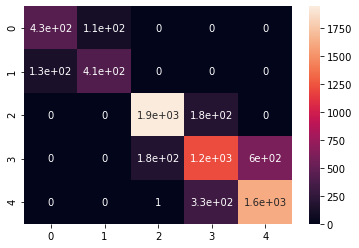

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_predict = xg.predict(X_dep)
print(classification_report(y_dep, y_predict))
cm= confusion_matrix(y_dep, y_predict)
sns.heatmap(cm, annot=True)

In [37]:
df2 = pd.DataFrame({'customer_id':test['customer_id'],'churn_risk_score':xg.predict(X_test)})
df2.to_csv('samplesubmission.csv',index=False)